In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows',100)

%matplotlib inline
print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [16]:
import pandas as pd
train_df = pd.read_csv('../data/train.csv')


print(f"Data shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")


display(train_df.head())
print("\nFirst 5 rows:")

Data shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



First 5 rows:


In [17]:
import os
print(f"Current directory: {os.getcwd()}")
print(f"Files in data folder: {os.listdir('../data')}")

Current directory: C:\Users\kings\data_analytics_portfolio\titanic_analysis\notebooks
Files in data folder: ['gender_submission.csv', 'test.csv', 'train.csv']


In [18]:
print(train_df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [19]:
# Cell 3: Data verification
print("=== DATA VERIFICATION ===")
print(f"1. Total rows: {len(train_df)}")
print(f"2. Total columns: {len(train_df.columns)}")
print(f"3. Column names: {train_df.columns.tolist()}")
print(f"4. Data types:\n{train_df.dtypes}")
print(f"5. Missing values:\n{train_df.isnull().sum()}")

=== DATA VERIFICATION ===
1. Total rows: 891
2. Total columns: 12
3. Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
4. Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
5. Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Titanic Survival Analysis - EDA
## Project Goal
Identify factors that influenced survival rates on the Titanic

## Analysis Plan
1. Data Overview & Structure
2. Data Cleaning & Preprocessing
3. Univariate Analysis (Single Variables)
4. Bivariate Analysis (Two Variables)
5. Multivariate Analysis
6. Key Insights & Recommendations

In [20]:
# Cell 5: Comprehensive Data Overview
print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)

# 5.1 Basic information
print("\n1. DATASET INFORMATION:")
print(f"   • Shape: {train_df.shape} (rows, columns)")
print(f"   • Memory Usage: {train_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 5.2 Column data types
print("\n2. DATA TYPES:")
print(train_df.dtypes.to_string())

# 5.3 Display first few rows with formatting
print("\n3. SAMPLE DATA (First 3 rows):")
display(train_df.head(3))

print("\n4. SAMPLE DATA (Last 3 rows):")
display(train_df.tail(3))

# 5.4 Random sample
print("\n5. RANDOM SAMPLE (5 rows):")
display(train_df.sample(5, random_state=42))

DATA OVERVIEW

1. DATASET INFORMATION:
   • Shape: (891, 12) (rows, columns)
   • Memory Usage: 285.61 KB

2. DATA TYPES:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object

3. SAMPLE DATA (First 3 rows):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



4. SAMPLE DATA (Last 3 rows):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



5. RANDOM SAMPLE (5 rows):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [21]:
# Cell 6: Data Quality Assessment
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# 6.1 Missing values analysis
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100

print("\n1. MISSING VALUES:")
missing_df = pd.DataFrame({
    'Missing_Values': missing_data,
    'Percentage (%)': missing_percent.round(2)
})
print(missing_df[missing_df['Missing_Values'] > 0].sort_values('Percentage (%)', ascending=False))

# 6.2 Duplicate check
duplicates = train_df.duplicated().sum()
print(f"\n2. DUPLICATE ROWS: {duplicates}")

# 6.3 Unique values per column
print("\n3. UNIQUE VALUES PER COLUMN:")
for col in train_df.columns:
    unique_count = train_df[col].nunique()
    if unique_count < 15:  # Show values for low-cardinality columns
        print(f"   • {col}: {unique_count} unique → {train_df[col].unique()}")
    else:
        print(f"   • {col}: {unique_count} unique values")

DATA QUALITY ASSESSMENT

1. MISSING VALUES:
          Missing_Values  Percentage (%)
Cabin                687           77.10
Age                  177           19.87
Embarked               2            0.22

2. DUPLICATE ROWS: 0

3. UNIQUE VALUES PER COLUMN:
   • PassengerId: 891 unique values
   • Survived: 2 unique → [0 1]
   • Pclass: 3 unique → [3 1 2]
   • Name: 891 unique values
   • Sex: 2 unique → ['male' 'female']
   • Age: 88 unique values
   • SibSp: 7 unique → [1 0 3 4 2 5 8]
   • Parch: 7 unique → [0 1 2 5 3 4 6]
   • Ticket: 681 unique values
   • Fare: 248 unique values
   • Cabin: 147 unique values
   • Embarked: 3 unique → ['S' 'C' 'Q' nan]


In [22]:


# Cell 4: Basic Data Exploration
print("=" * 60)
print("BASIC DATA EXPLORATION")
print("=" * 60)

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW:")
print(f"• Shape: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"• Memory Usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. Column Information
print("\n2. COLUMN INFORMATION:")
for col in train_df.columns:
    dtype = train_df[col].dtype
    unique = train_df[col].nunique()
    print(f"• {col:15} | Type: {str(dtype):10} | Unique Values: {unique:3}")

# 3. Statistical Summary
print("\n3. NUMERICAL FEATURES - STATISTICAL SUMMARY:")
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
print(train_df[numeric_cols].describe().round(2))

# 4. Categorical Features Summary
print("\n4. CATEGORICAL FEATURES - VALUE COUNTS:")
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for col in categorical_cols:
    if col in train_df.columns:
        print(f"\n{col}:")
        print(train_df[col].value_counts().head())

# 5. Missing Values Summary
print("\n5. MISSING VALUES ANALYSIS:")
missing_df = pd.DataFrame({
    'Missing_Count': train_df.isnull().sum(),
    'Missing_Percentage': (train_df.isnull().sum() / len(train_df) * 100).round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])

# 6. Duplicate Check
duplicates = train_df.duplicated().sum()
print(f"\n6. DUPLICATE ROWS: {duplicates}")

print("\n" + "=" * 60)
print("EXPLORATION COMPLETE")
print("=" * 60)

BASIC DATA EXPLORATION

1. DATASET OVERVIEW:
• Shape: 891 rows, 12 columns
• Memory Usage: 0.28 MB

2. COLUMN INFORMATION:
• PassengerId     | Type: int64      | Unique Values: 891
• Survived        | Type: int64      | Unique Values:   2
• Pclass          | Type: int64      | Unique Values:   3
• Name            | Type: object     | Unique Values: 891
• Sex             | Type: object     | Unique Values:   2
• Age             | Type: float64    | Unique Values:  88
• SibSp           | Type: int64      | Unique Values:   7
• Parch           | Type: int64      | Unique Values:   7
• Ticket          | Type: object     | Unique Values: 681
• Fare            | Type: float64    | Unique Values: 248
• Cabin           | Type: object     | Unique Values: 147
• Embarked        | Type: object     | Unique Values:   3

3. NUMERICAL FEATURES - STATISTICAL SUMMARY:
       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.

In [26]:
# Cell 5: Data Cleaning
print("=" * 60)
print("DATA CLEANING PROCESS")
print("=" * 60)

# Make a copy for cleaning (preserve original)
df_clean = train_df.copy()
print(f"Working on copy. Original shape preserved: {train_df.shape}")

# 1. Handle Missing Age (Impute with median by Pclass and Sex)
print("\n1. HANDLING MISSING AGE VALUES:")
age_before = df_clean['Age'].isnull().sum()
print(f"Missing Age values before: {age_before}")

# Calculate median age by Pclass and Sex
age_medians = df_clean.groupby(['Pclass', 'Sex'])['Age'].median()
print(f"\nMedian Age by Pclass & Sex:")
print(age_medians)

# Create function to impute age
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex']]
    return row['Age']

# Apply imputation
df_clean['Age'] = df_clean.apply(impute_age, axis=1)
age_after = df_clean['Age'].isnull().sum()
print(f"Missing Age values after: {age_after}")

# 2. Handle Missing Embarked (only 2 values)
print("\n2. HANDLING MISSING EMBARKED VALUES:")
embarked_before = df_clean['Embarked'].isnull().sum()
print(f"Missing Embarked before: {embarked_before}")

# Fill with mode (most frequent value)
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)
embarked_after = df_clean['Embarked'].isnull().sum()
print(f"Filled with mode: '{embarked_mode}'")
print(f"Missing Embarked after: {embarked_after}")

# 3. Handle Cabin (too many missing, create new feature instead)
print("\n3. HANDLING CABIN FEATURE:")
cabin_before = df_clean['Cabin'].isnull().sum()
print(f"Missing Cabin values: {cabin_before} ({cabin_before/len(df_clean)*100:.1f}%)")

# Create new binary feature: Has_Cabin
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
print(f"Created new feature: 'Has_Cabin'")
print(f"Passengers with cabin: {df_clean['Has_Cabin'].sum()}")

# Drop original Cabin column (optional, we'll keep for now but mark it)
df_clean['Cabin'] = df_clean['Cabin'].fillna('Unknown')

# 4. Verify no missing values remain
print("\n4. FINAL MISSING VALUES CHECK:")
missing_final = df_clean.isnull().sum().sum()
print(f"Total missing values remaining: {missing_final}")

if missing_final == 0:
    print("✓ ALL MISSING VALUES HANDLED SUCCESSFULLY!")
else:
    print(f"Warning: {missing_final} missing values still exist")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# 5. Create additional useful features
print("\n5. CREATING NEW FEATURES:")

# Family Size
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
print(f"• Created 'FamilySize' = SibSp + Parch + 1")

# Age Group
def create_age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df_clean['AgeGroup'] = df_clean['Age'].apply(create_age_group)
print(f"• Created 'AgeGroup': Child(≤12), Teen(13-18), Adult(19-60), Senior(>60)")

# Title from Name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(f"• Extracted 'Title' from Name")
print(f"  Common titles: {df_clean['Title'].value_counts().head(5).to_dict()}")

print("\n" + "=" * 60)
print(f"CLEAN DATASET INFO:")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")
print("=" * 60)

DATA CLEANING PROCESS
Working on copy. Original shape preserved: (891, 12)

1. HANDLING MISSING AGE VALUES:
Missing Age values before: 177

Median Age by Pclass & Sex:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
Missing Age values after: 0

2. HANDLING MISSING EMBARKED VALUES:
Missing Embarked before: 2
Filled with mode: 'S'
Missing Embarked after: 0

3. HANDLING CABIN FEATURE:
Missing Cabin values: 687 (77.1%)
Created new feature: 'Has_Cabin'
Passengers with cabin: 204

4. FINAL MISSING VALUES CHECK:
Total missing values remaining: 0
✓ ALL MISSING VALUES HANDLED SUCCESSFULLY!

5. CREATING NEW FEATURES:
• Created 'FamilySize' = SibSp + Parch + 1
• Created 'AgeGroup': Child(≤12), Teen(13-18), Adult(19-60), Senior(>60)
• Extracted 'Title' from Name
  Common titles: {'Mr': 517, 'Miss': 182, 'Mrs': 125, 'Master': 40, 'Dr': 7}

CLEAN DATASET INFO:
Shape: (89

QUESTION 1: OVERALL SURVIVAL RATE

📊 OVERALL SURVIVAL STATISTICS:
• Total Passengers: 891
• Survived: 342 (38.4%)
• Perished: 549 (61.6%)

✅ Chart saved to: ../outputs/overall_survival.png


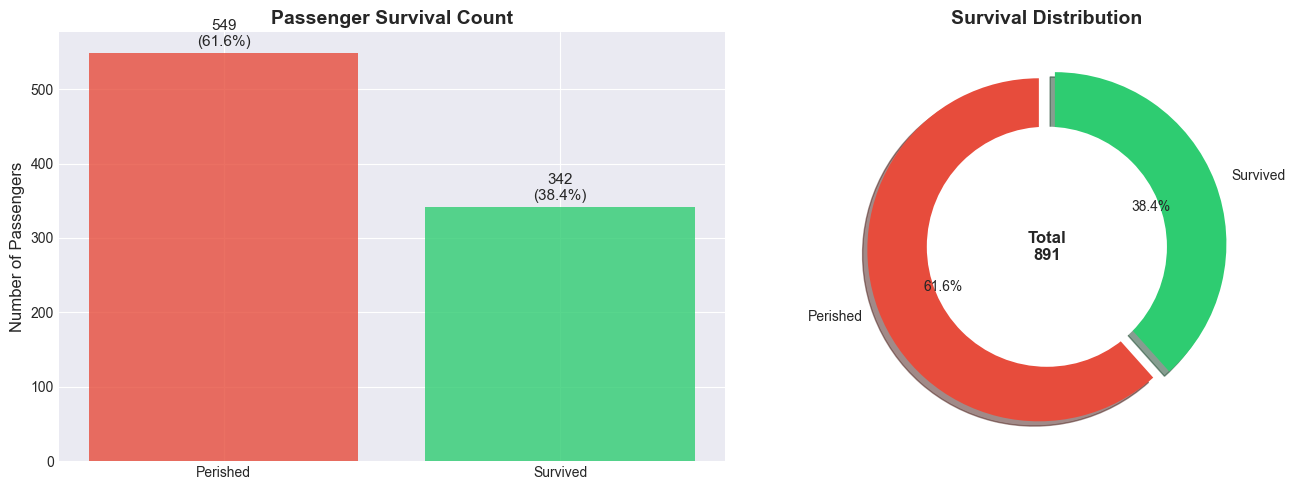


🔍 ADDITIONAL INSIGHTS:

Survival Rate by Sex:
  female: 74.2%
  male: 18.9%

Survival Rate by Pclass:
  1: 63.0%
  2: 47.3%
  3: 24.2%

Survival Rate by Embarked:
  C: 55.4%
  Q: 39.0%
  S: 33.9%

ANALYSIS COMPLETE


In [27]:
# Cell 6: Overall Survival Analysis
print("=" * 60)
print("QUESTION 1: OVERALL SURVIVAL RATE")
print("=" * 60)

# Calculate survival statistics
total_passengers = len(df_clean)
survived = df_clean['Survived'].sum()
perished = total_passengers - survived
survival_rate = (survived / total_passengers) * 100

print(f"\n📊 OVERALL SURVIVAL STATISTICS:")
print(f"• Total Passengers: {total_passengers}")
print(f"• Survived: {survived} ({survival_rate:.1f}%)")
print(f"• Perished: {perished} ({100 - survival_rate:.1f}%)")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count plot
survival_counts = df_clean['Survived'].value_counts()
ax1 = axes[0]
bars = ax1.bar(['Perished', 'Survived'], [perished, survived], 
               color=['#e74c3c', '#2ecc71'], alpha=0.8)
ax1.set_title('Passenger Survival Count', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Passengers', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}\n({height/total_passengers*100:.1f}%)',
            ha='center', va='bottom', fontsize=11)

# Plot 2: Pie chart
ax2 = axes[1]
colors = ['#e74c3c', '#2ecc71']
explode = (0.05, 0.05)
ax2.pie([perished, survived], labels=['Perished', 'Survived'], 
        autopct='%1.1f%%', startangle=90, colors=colors,
        explode=explode, shadow=True)
ax2.set_title('Survival Distribution', fontsize=14, fontweight='bold')

# Add central text
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
ax2.text(0, 0, f'Total\n{total_passengers}', 
         ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()

# Save the figure
output_path = '../outputs/overall_survival.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Chart saved to: {output_path}")

plt.show()

# Additional insights
print("\n🔍 ADDITIONAL INSIGHTS:")
# Survival by simple demographics
for feature in ['Sex', 'Pclass', 'Embarked']:
    survival_by_feature = df_clean.groupby(feature)['Survived'].mean() * 100
    print(f"\nSurvival Rate by {feature}:")
    for value, rate in survival_by_feature.items():
        print(f"  {value}: {rate:.1f}%")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

QUESTION 2: SURVIVAL BY GENDER

📊 GENDER SURVIVAL STATISTICS:
        Total  Survived_Count  Survival_Rate  Perished_Count  Perished_Rate
Sex                                                                        
female    314             233           74.2              81           25.8
male      577             109           18.9             468           81.1

📈 KEY FINDINGS:
• Female survival rate: 74.2%
• Male survival rate: 18.9%
• Overall survival rate: 38.4%
• Women were 3.9x more likely to survive than men

✅ Chart saved to: ../outputs/gender_survival.png


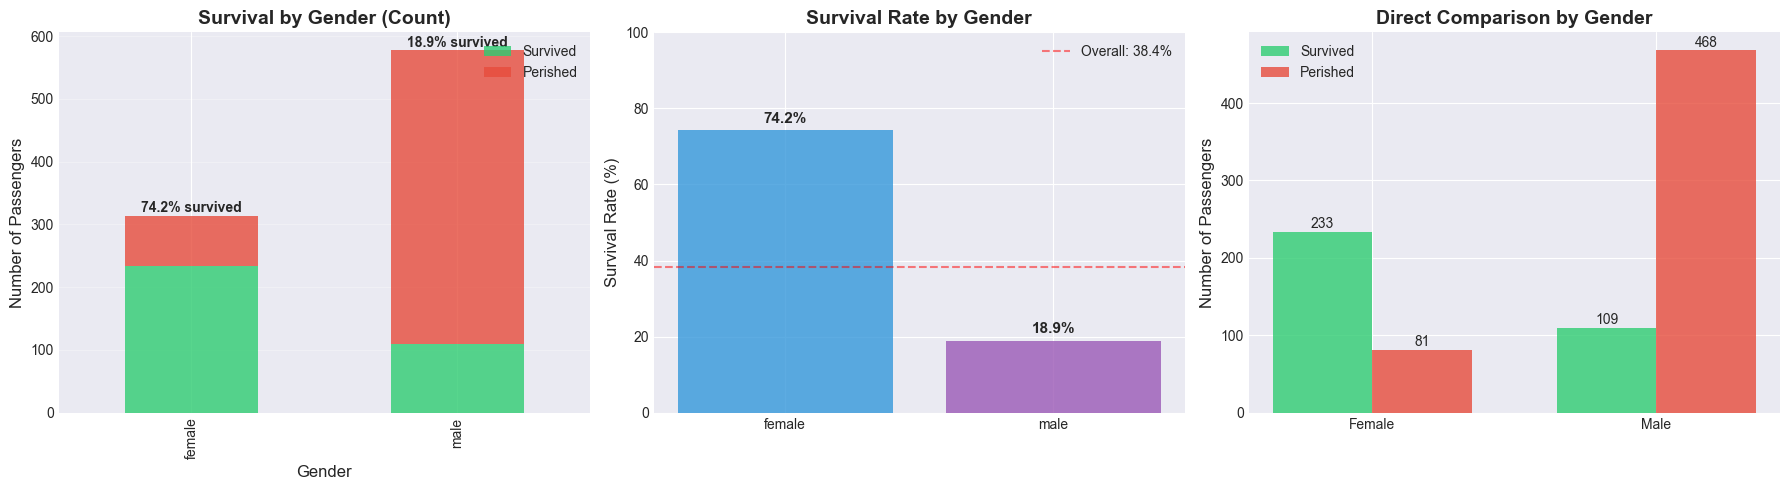


🔍 ADVANCED ANALYSIS: GENDER + PASSENGER CLASS
Pclass     1     2     3
Sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5
✅ Heatmap saved to: ../outputs/gender_class_heatmap.png


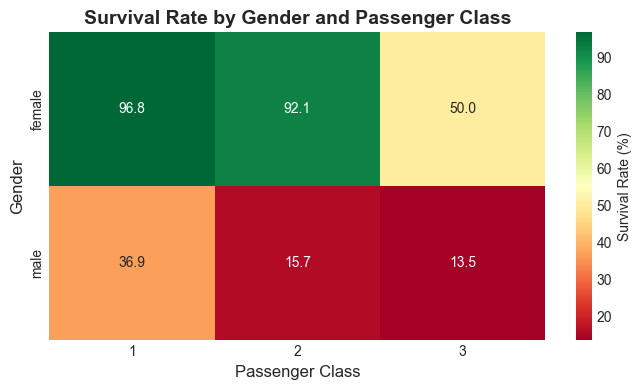


KEY TAKEAWAYS:
1. Female survival rate was significantly higher than male
2. 'Women and children first' protocol was followed
3. Gender was one of the strongest predictors of survival


In [28]:
# Cell 7: Survival by Gender Analysis
print("=" * 60)
print("QUESTION 2: SURVIVAL BY GENDER")
print("=" * 60)

# Calculate gender-based survival
gender_survival = df_clean.groupby('Sex').agg({
    'PassengerId': 'count',
    'Survived': ['sum', 'mean']
}).round(3)

gender_survival.columns = ['Total', 'Survived_Count', 'Survival_Rate']
gender_survival['Survival_Rate'] = gender_survival['Survival_Rate'] * 100
gender_survival['Perished_Count'] = gender_survival['Total'] - gender_survival['Survived_Count']
gender_survival['Perished_Rate'] = 100 - gender_survival['Survival_Rate']

print("\n📊 GENDER SURVIVAL STATISTICS:")
print(gender_survival)

# Calculate overall comparison
total_passengers = gender_survival['Total'].sum()
total_survived = gender_survival['Survived_Count'].sum()
overall_rate = total_survived / total_passengers * 100

print(f"\n📈 KEY FINDINGS:")
print(f"• Female survival rate: {gender_survival.loc['female', 'Survival_Rate']:.1f}%")
print(f"• Male survival rate: {gender_survival.loc['male', 'Survival_Rate']:.1f}%")
print(f"• Overall survival rate: {overall_rate:.1f}%")

# Calculate odds
female_odds = gender_survival.loc['female', 'Survival_Rate'] / gender_survival.loc['male', 'Survival_Rate']
print(f"• Women were {female_odds:.1f}x more likely to survive than men")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Stacked bar chart
ax1 = axes[0]
gender_data = gender_survival[['Survived_Count', 'Perished_Count']]
gender_data.plot(kind='bar', stacked=True, ax=ax1, 
                 color=['#2ecc71', '#e74c3c'], alpha=0.8)
ax1.set_title('Survival by Gender (Count)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Passengers', fontsize=12)
ax1.set_xlabel('Gender', fontsize=12)
ax1.legend(['Survived', 'Perished'], loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (gender, row) in enumerate(gender_survival.iterrows()):
    total = row['Total']
    survived_pct = row['Survival_Rate']
    ax1.text(i, total + 5, f"{survived_pct:.1f}% survived", 
             ha='center', fontsize=10, fontweight='bold')

# Plot 2: Survival rate comparison
ax2 = axes[1]
rates = gender_survival['Survival_Rate']
colors = ['#3498db', '#9b59b6']
bars = ax2.bar(rates.index, rates.values, color=colors, alpha=0.8)
ax2.set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
ax2.set_ylabel('Survival Rate (%)', fontsize=12)
ax2.set_ylim(0, 100)
ax2.axhline(y=overall_rate, color='red', linestyle='--', alpha=0.5, 
            label=f'Overall: {overall_rate:.1f}%')
ax2.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Plot 3: Side-by-side comparison
ax3 = axes[2]
x = np.arange(2)
width = 0.35

survived_bars = ax3.bar(x - width/2, gender_survival['Survived_Count'], 
                        width, label='Survived', color='#2ecc71', alpha=0.8)
perished_bars = ax3.bar(x + width/2, gender_survival['Perished_Count'], 
                        width, label='Perished', color='#e74c3c', alpha=0.8)

ax3.set_title('Direct Comparison by Gender', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Passengers', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels(['Female', 'Male'])
ax3.legend()

# Add count labels
for bars in [survived_bars, perished_bars]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()

# Save the figure
output_path = '../outputs/gender_survival.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Chart saved to: {output_path}")

plt.show()

# Advanced analysis: Gender combined with Pclass
print("\n🔍 ADVANCED ANALYSIS: GENDER + PASSENGER CLASS")
gender_class_survival = df_clean.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack() * 100
print(gender_class_survival.round(1))

# Create heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(gender_class_survival, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'Survival Rate (%)'})
plt.title('Survival Rate by Gender and Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Gender', fontsize=12)

# Save heatmap
heatmap_path = '../outputs/gender_class_heatmap.png'
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
print(f"✅ Heatmap saved to: {heatmap_path}")

plt.show()

print("\n" + "=" * 60)
print("KEY TAKEAWAYS:")
print("1. Female survival rate was significantly higher than male")
print("2. 'Women and children first' protocol was followed")
print("3. Gender was one of the strongest predictors of survival")
print("=" * 60)